## Feature extraction

This documents show how to extract important timeseries charcterstics from raster files.

In [1]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
import tsraster.prep as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features_to_array

connect to the data directory

In [2]:
path = "../docs/img/temperature/"

read the images and convert the arrays to a time-series dataframe 

In [3]:
rasters = tr.image_to_series(path)

Lets take a look at the time-series data

In [4]:
rasters.head(10)

,id,kind,value,time
0,1,tmx-200501,0,200501
1,1,tmx-200502,0,200502
2,1,tmx-200503,0,200503
3,1,tmx-200601,0,200601
4,1,tmx-200602,0,200602
5,1,tmx-200603,0,200603
6,1,tmx-200701,0,200701
7,1,tmx-200702,0,200702
8,1,tmx-200703,0,200703
9,2,tmx-200501,0,200501


Accordingly, each pixel is identified by *id*. Since there are 9 bands (3 images per year), **tsraster** assigns each 9 first pixels the id number 1 and differentiate each by their respective year and month. Hence, the *time* column organizes and orders pixels by time. The *value* column represent the pixel value

We can summerize the data and examine its pattern.

In [5]:
rasters.describe()

,value
count,8.789760e+06
mean,6.963103e+00
std,1.106387e+01
min,-7.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.300000e+01
max,4.900000e+01


Let's go ahead and extract features

In [6]:
fc_parameters = {
    "mean": None,
    "maximum": None,
    "minimum":None,
    # example: pass multiple calls 
    "quantile":[{"q": 0.15}, {"q": 0.95}]
}


ts_features = calculateFeatures(path,
                                parameters=fc_parameters, 
                                reset_df=True)

df: ../docs/img/temperature/my_df.csv


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [01:37<00:00,  2.13s/it]


features:..\docs\img\temperature_features\extracted_features.csv
tif:..\docs\img\temperature_features\extracted_features.tiff


The feature extraction swift through all bands and calculate values such maximum, minimum and mean, median. 
In this instance, 4 features of temprature data are generated for 9 rasters representing 3 months of 3 years of data.

Let's take a look at the summary of these features.

In [7]:
ts_features.describe()

,tmx-value__maximum,tmx-value__mean,tmx-value__minimum,tmx-value__quantile__q_0.15,tmx-value__quantile__q_0.95
count,976640.000000,976640.000000,976640.000000,976640.000000,976640.000000
mean,12.073717,6.963103,3.600137,4.068339,11.664085
std,16.483459,9.731706,5.542686,6.089460,15.943853
min,0.000000,-0.333333,-7.000000,-6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,17.222222,8.000000,9.200000,29.800000
max,49.000000,30.666667,20.000000,20.200000,47.800000


Next, convert these features to array, visualize or create a tiff

In [9]:
# first, get the original dimension/shape of image 
og_rasters = tr.image_to_array(path)
rows, cols, nums = og_rasters.shape


# convert df to matrix array
matrix_features = ts_features.values
num_of_layers = matrix_features.shape[1]


f2Array = matrix_features.reshape(rows, cols, num_of_layers)
print(f2Array.shape)


(1120, 872, 5)


visualize features

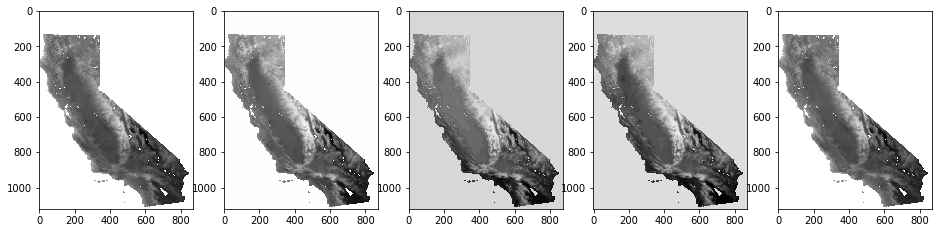

In [13]:
fig, ax = plt.subplots(2,2,figsize=(16,10))

for i in range(0,f2Array.shape[2]):
    img = f2Array[:,:,i]
    i = i+1
    plt.subplot(1,5,i)
    plt.imshow(img, cmap="Greys")
